# Map Projections and Dot Maps

## Who is John Snow?

[Wikipedia](https://en.wikipedia.org/wiki/John_Snow)

## 1854 Borad Street Cholera Outbreak

- In 1854, London was hit by a severe cholera outbreak.
- At the time, the cause of cholera was not known. There were two theories: the germ theory and the miasma theory.
- John Snow decided to investigate the cause, and the started by making a **dot map.**

## John Snow's Dot Map

![dot_map_1.png](data/dot_map_1.png)

Each "dot" (thin black box) represents a cholera case.

![dot_map_2.png](data/dot_map_2.png)

Snow observed that cholera cases centered around the Broad Street water pump.

## Snow's Analysis

Snow followed up on the insight with careful, on-the-ground detective work.

[On the Mode of Communication of Cholera](https://www.gutenberg.org/files/72894/72894-h/72894-h.htm)

*There were only ten deaths in houses situated decidedly nearer to another street-pump. In five of these cases the families of the deceased persons informed me that they always sent to the pump in Broad Street, as they preferred the water to that of the pumps which were nearer. In three other cases, the deceased were children who went to school near the pump in Broad Street....*

## The End of the Story

In the end, Snow was able to build a strong case that the Broad Street pump was the source of the cholera outbreak.

*The result of the inquiry, then, is, that there was been no particular outbreak or prevalence of cholera in this part of London except among the persons who were in the habit of drinking the water of the above-mentioned pump well....In consequence of what I said, the handle of the pump was removed on the following day.*

Snow’s analysis established cholera as a waterborne disease and affirmed the germ theory of disease.

## Geographical Center of North America

In 1930, a USGS employee took a cutout of the map of North America and balanced it on the top of a pin.

They found that the center was a town called Rugby, ND.

## Dispute with Robinson, ND

Meanwhile, Bill Bender of Robinson, ND (100 miles to the south of Rugby) claimed that the center of North America was under his bar, Hanson’s Bar.

They trademarked the phrase "Geographical Center of North America".

## A Third Contender

Peter Rogerson, a professor of Geography and Biostatistics, got wind about this debate.

He took latitudes and longitudes from all around North America, and used those coordinates to find the center.

"You have to take into account that the Earth’s surface is curved."

He found that the geographical center was in a town called... Center, ND (no joke!).

## The Geographical Center

The controversy started because of the way the Earth’s surface was flattened. Depending on which way you flatten, you’ll get a different center.

![geographical_centers_of_na](data/geographical_centers_of_na.png)

The controversy started because of the way the Earth’s surface was flattened. Depending on which way you flatten, you’ll get a different center.

## Map Projection

**Map projection** refers to the way the curved surface of the Earth is represented as a flat surface.

One of the earliest projections was proposed by Gerardus Mercator in 1569.

## The *West Wing* on Map Projections

[YouTube](https://www.youtube.com/watch?v=vVX-PrBRtTY)

![four_map_projections](data/four_map_projections_1.png)

**Moral:** No projection is perfect. Every projection has tradeoffs.

## What Your Favorite Map Projection Says About You

![four_map_projections_2](data/four_map_projections_2.png)

## Map Projections and Dot Maps

Let's read in John Snow's cholera data.

In [1]:
import pandas as pd

directory = "data"
df_deaths = pd.read_csv(f"{directory}/deaths.csv")
df_deaths

,Longitude,Latitude,Count
0,-0.137930,51.513418,3
1,-0.137883,51.513361,2
2,-0.137853,51.513317,1
3,-0.137812,51.513262,1
4,-0.137767,51.513204,4
...,...,...,...
245,-0.137108,51.514526,3
246,-0.137065,51.514706,2
247,-0.138474,51.512311,1
248,-0.138123,51.511998,1


One way to visualize this data is to make a scatterplot of the deaths using latitude and longitude. This is a crude approximation.

<Axes: xlabel='Longitude', ylabel='Latitude'>

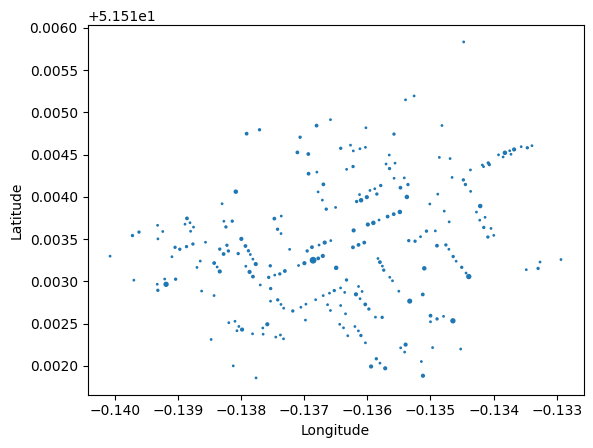

In [2]:
df_deaths.plot.scatter(x="Longitude", y="Latitude", s="Count")

## Map Projections

But we know that for geospatial data, we should use a proper map projection.

Geopandas is a Python library for reading and processing geospatial data. It provides a data structure called a `GeoDataFrame`, which is the analog of Pandas's `DataFrame`.

In [3]:
import geopandas as gpd

The map projection is specified using a **Coordinate Reference System** (or CRS). Every projection has a CRS code. For example:

- the Mercator projection has code EPSG:4326
- the Robinson projection has code ESRI:53030

You can look up the code for different projections [here](https://epsg.io/).


In [4]:
gdf_deaths = gpd.GeoDataFrame(
    df_deaths,
    geometry=gpd.points_from_xy(
        x=df_deaths["Longitude"],
        y=df_deaths["Latitude"]
    ),
    crs="EPSG:4326"
)
gdf_deaths

,Longitude,Latitude,Count,geometry
0,-0.137930,51.513418,3,POINT (-0.13793 51.51342)
1,-0.137883,51.513361,2,POINT (-0.13788 51.51336)
2,-0.137853,51.513317,1,POINT (-0.13785 51.51332)
3,-0.137812,51.513262,1,POINT (-0.13781 51.51326)
4,-0.137767,51.513204,4,POINT (-0.13777 51.5132)
...,...,...,...,...
245,-0.137108,51.514526,3,POINT (-0.13711 51.51453)
246,-0.137065,51.514706,2,POINT (-0.13706 51.51471)
247,-0.138474,51.512311,1,POINT (-0.13847 51.51231)
248,-0.138123,51.511998,1,POINT (-0.13812 51.512)


If we call `.plot()` on a `GeoDataFrame`, it automatically makes a map of the data.

<Axes: >

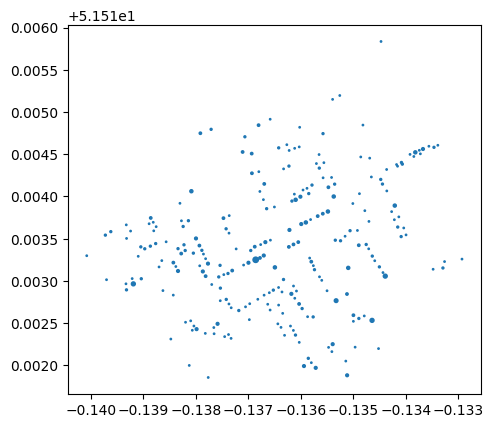

In [5]:
gdf_deaths.plot(markersize="Count")

We can change the CRS using `.to_crs()`. For example, to map the same data using the Robinson projection instead, would do the following.

<Axes: >

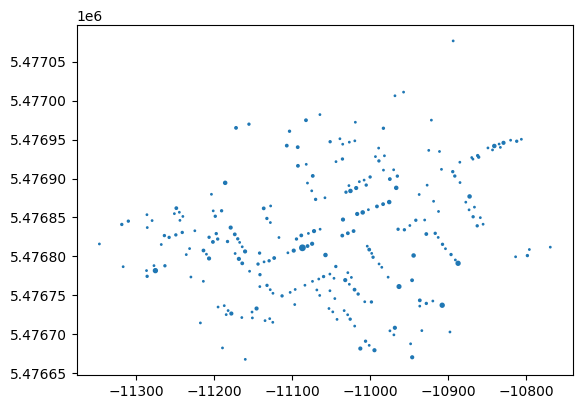

In [6]:
gdf_deaths.to_crs("ESRI:53030").plot(markersize="Count")

## Adding the Pumps

First, we read in the pumps data.

In [7]:
df_pumps = pd.read_csv(f"{directory}/pumps.csv")
df_pumps

,Name,Longitude,Latitude
0,Broad St Pump,-0.136668,51.513341
1,Little Marlborough St Pump,-0.139586,51.513876
2,Marlborough Mews Pump,-0.139671,51.514906
3,Dean St Pump,-0.131630,51.512354
4,Rupert St Pump,-0.133594,51.512139
5,Bridle St Pump,-0.135919,51.511542
6,Tighborne St Pump,-0.133962,51.510019
7,Warwick St Pump,-0.138199,51.511295


We convert this to a `GeoDataFrame` as well.

In [8]:
gdf_pumps = gpd.GeoDataFrame(
    df_pumps,
    geometry=gpd.points_from_xy(
        x=df_pumps["Longitude"],
        y=df_pumps["Latitude"]
    ),
    crs="EPSG:4326"
)
gdf_pumps

,Name,Longitude,Latitude,geometry
0,Broad St Pump,-0.136668,51.513341,POINT (-0.13667 51.51334)
1,Little Marlborough St Pump,-0.139586,51.513876,POINT (-0.13959 51.51388)
2,Marlborough Mews Pump,-0.139671,51.514906,POINT (-0.13967 51.51491)
3,Dean St Pump,-0.131630,51.512354,POINT (-0.13163 51.51235)
4,Rupert St Pump,-0.133594,51.512139,POINT (-0.13359 51.51214)
5,Bridle St Pump,-0.135919,51.511542,POINT (-0.13592 51.51154)
6,Tighborne St Pump,-0.133962,51.510019,POINT (-0.13396 51.51002)
7,Warwick St Pump,-0.138199,51.511295,POINT (-0.1382 51.5113)


Now we display the deaths and pumps on the same map.

<Axes: >

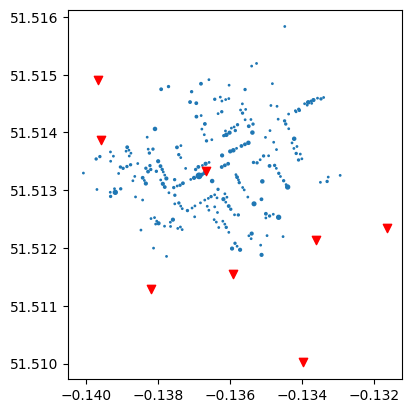

In [9]:
ax = gdf_deaths.plot(markersize="Count")
gdf_pumps.plot(ax=ax, color="red", marker="v")

## Adding a Background Map

We want to overlay these points on a map of London. To do this, we can use a library called `contextily`, which fetches web map tiles from [OpenStreetMap](https://www.openstreetmap.org/#map=4/38.01/-95.84).

In [10]:
!uv add contextily -q

In [11]:
import contextily as cx

OpenStreetMap uses a specific CRS called "Web Mercator", whose code is EPSG:3857. So we need to convert all of our data to this CRS.